In [2]:
import numpy as np
import pandas as pd
from meza import io, process as pr, convert as cv
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import seaborn as sns
from io import open
import itertools as it
import matplotlib.pyplot as plt


In [3]:
records = io.read('/home/ariviere/Documents/Bassin_Seine/Temperature/Temperature_data/Temper_Data_2020.mdb')


In [4]:
temp_seine=open("/home/ariviere/Documents/Bassin_Seine/Temperature/Temperature_data/TJ_SEINE-PARIS_2020.csv", "r")

In [5]:
temp_air=open("/home/ariviere/Documents/Bassin_Seine/Temperature/Temperature_data/Temp_Air.csv", "r")

In [6]:
temp_seine = pd.read_csv('/home/ariviere/Documents/Bassin_Seine/Temperature/Temperature_data/TJ_SEINE-PARIS_2020.csv',sep=';', index_col=0, parse_dates=True)
temp_seine.head()


,Temp,Origine,Site
Date,,,
1893-11-06,18.9,11,19
1893-12-06,19.0,11,19
1893-06-13,19.6,11,19
1893-06-14,20.6,11,19
1893-06-15,20.7,11,19


In [20]:
# Add columns with year, month, 
temp_seine['Year'] = temp_seine.index.year
temp_seine['Month'] = temp_seine.index.month
temp_seine['year_month'] = pd.to_datetime(temp_seine.index)
# Display a random sampling of 5 rows
temp_seine.sample(5, random_state=0)

,Temp,Origine,Site,Year,Month,year_month
Date,,,,,,
2005-03-17,9.05,15,22,2005,3,2005-03-17
1899-01-03,5.40,11,19,1899,1,1899-01-03
1903-09-30,16.60,11,19,1903,9,1903-09-30
1921-07-10,18.80,11,2,1921,7,1921-07-10
1928-09-23,18.20,11,2,1928,9,1928-09-23


In [21]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

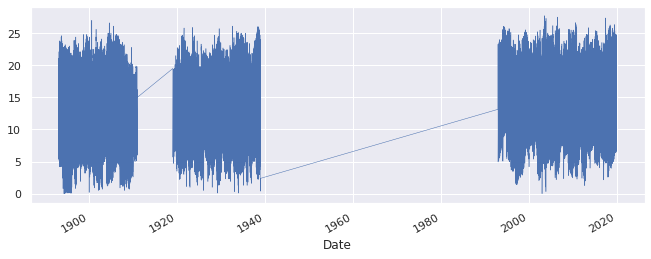

In [22]:
temp_seine['Temp'].plot(linewidth=0.5);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


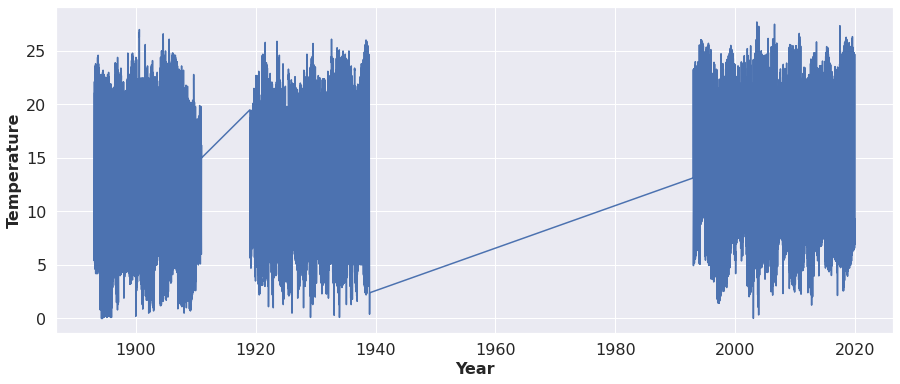

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(temp_seine['year_month'],temp_seine['Temp'] )

ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Temperature', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

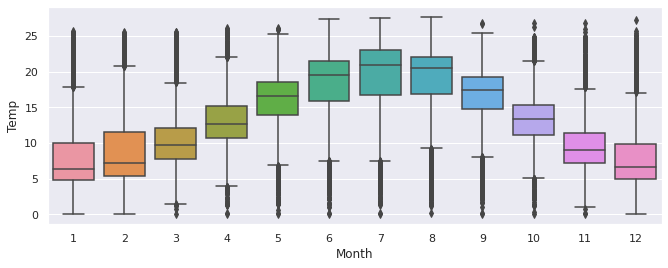

In [18]:
#Seasonality
sns.boxplot(data=temp_seine, x='Month', y='Temp');

In [25]:
#Time Series Components
y = temp_seine['year_month','Temp']
y = y.set_index('year_month')

from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomp = decomposition.plot()
decomp.suptitle('Temperature Decomposition', fontsize=22)

KeyError: ('year_month', 'Temp')